# Daily Challenge - Statistics for Machine Learning

# Applying Inferential Statistics

### Here are the hypotheses to test:
1. Age of people who left the bank and who did not are similar. Alternative: Not similar.
2. Credit score of people who left the bank and who did not are similar. Alternative: Not similar.
3. Balance of people who left the bank and who did not are similar. Alternative: Not similar.
4. Estimated Salary of people who left the bank and who did not are similar. Alternative: Not similar.

#### The most appropriate test to analyse data here is Frequentist test.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy.stats
from scipy.stats import t
from scipy.special import stdtr
from numpy.random import seed
import seaborn as sns

%matplotlib inline
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")

In [2]:
matplotlib.rcParams['figure.figsize'] = (8.0, 5.0)

In [7]:
## TODO : load the csv file from this link : https://www.kaggle.com/code/vaibhagarwal/inferential-statistics/input
## file_1 =

# Charger le fichier CSV
df = pd.read_csv('Churn_Modelling.csv')

# Afficher les informations générales sur le dataset
df.info()

# Afficher les 5 premières lignes
df.head().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


,0,1,2,3,4
RowNumber,1,2,3,4,5
CustomerId,15634602,15647311,15619304,15701354,15737888
Surname,Hargrave,Hill,Onio,Boni,Mitchell
CreditScore,619,608,502,699,850
Geography,France,Spain,France,France,Spain
Gender,Female,Female,Female,Female,Female
Age,42,41,42,39,43
Tenure,2,1,8,1,2
Balance,0.0,83807.86,159660.8,0.0,125510.82
NumOfProducts,1,1,3,2,1


In [8]:
## TODO : make into a dataframe called df
## df =
df = pd.read_csv("Churn_Modelling.csv")


In [9]:
## TODO : output the first 5 lines
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
## TODO : Create two separate DataFrames, `df_0` and `df_1`, to filter customers who have not exited (0) and customers who have exited (1), respectively

df_0 = df[df["Exited"] == 0]  # Clients qui sont restés
df_1 = df[df["Exited"] == 1]  # Clients qui ont quitté (churn)

## Hypothesis 1: Age

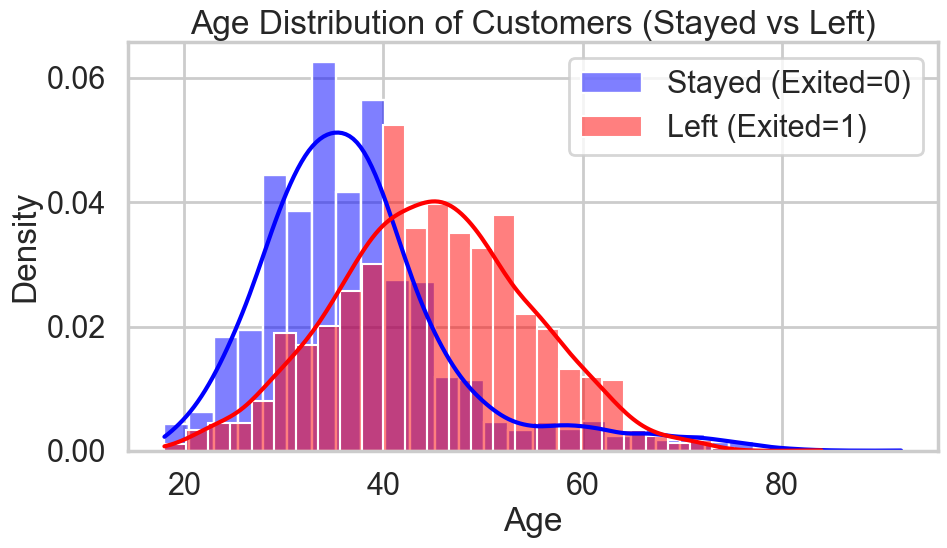

In [13]:
## TODO: Plot the age distribution for customers who stayed with the bank and those who left using seaborn, with different colors for each group and a legend.

plt.figure(figsize=(10, 6))
sns.histplot(df_0["Age"], color="blue", label="Stayed (Exited=0)", kde=True, stat="density", bins=30)
sns.histplot(df_1["Age"], color="red", label="Left (Exited=1)", kde=True, stat="density", bins=30)

plt.title("Age Distribution of Customers (Stayed vs Left)")
plt.xlabel("Age")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()

Les clients plus âgés quittent davantage la banque :

Le pic rouge est plus déplacé vers la droite (~45-50 ans), ce qui montre que le churn est plus fréquent chez les clients plus âgés.

Ce segment pourrait ressentir un manque d’accompagnement, une insatisfaction ou une recherche de meilleures offres ailleurs.

Les clients fidèles sont majoritairement plus jeunes :

Le pic bleu est plus marqué autour des 35-40 ans.

Cela peut indiquer que les clients plus jeunes sont plus engagés ou que les produits actuels répondent mieux à leurs besoins.

Âge moyen des clients restés : 37.40838879819164
Écart type : 10.125362911047539


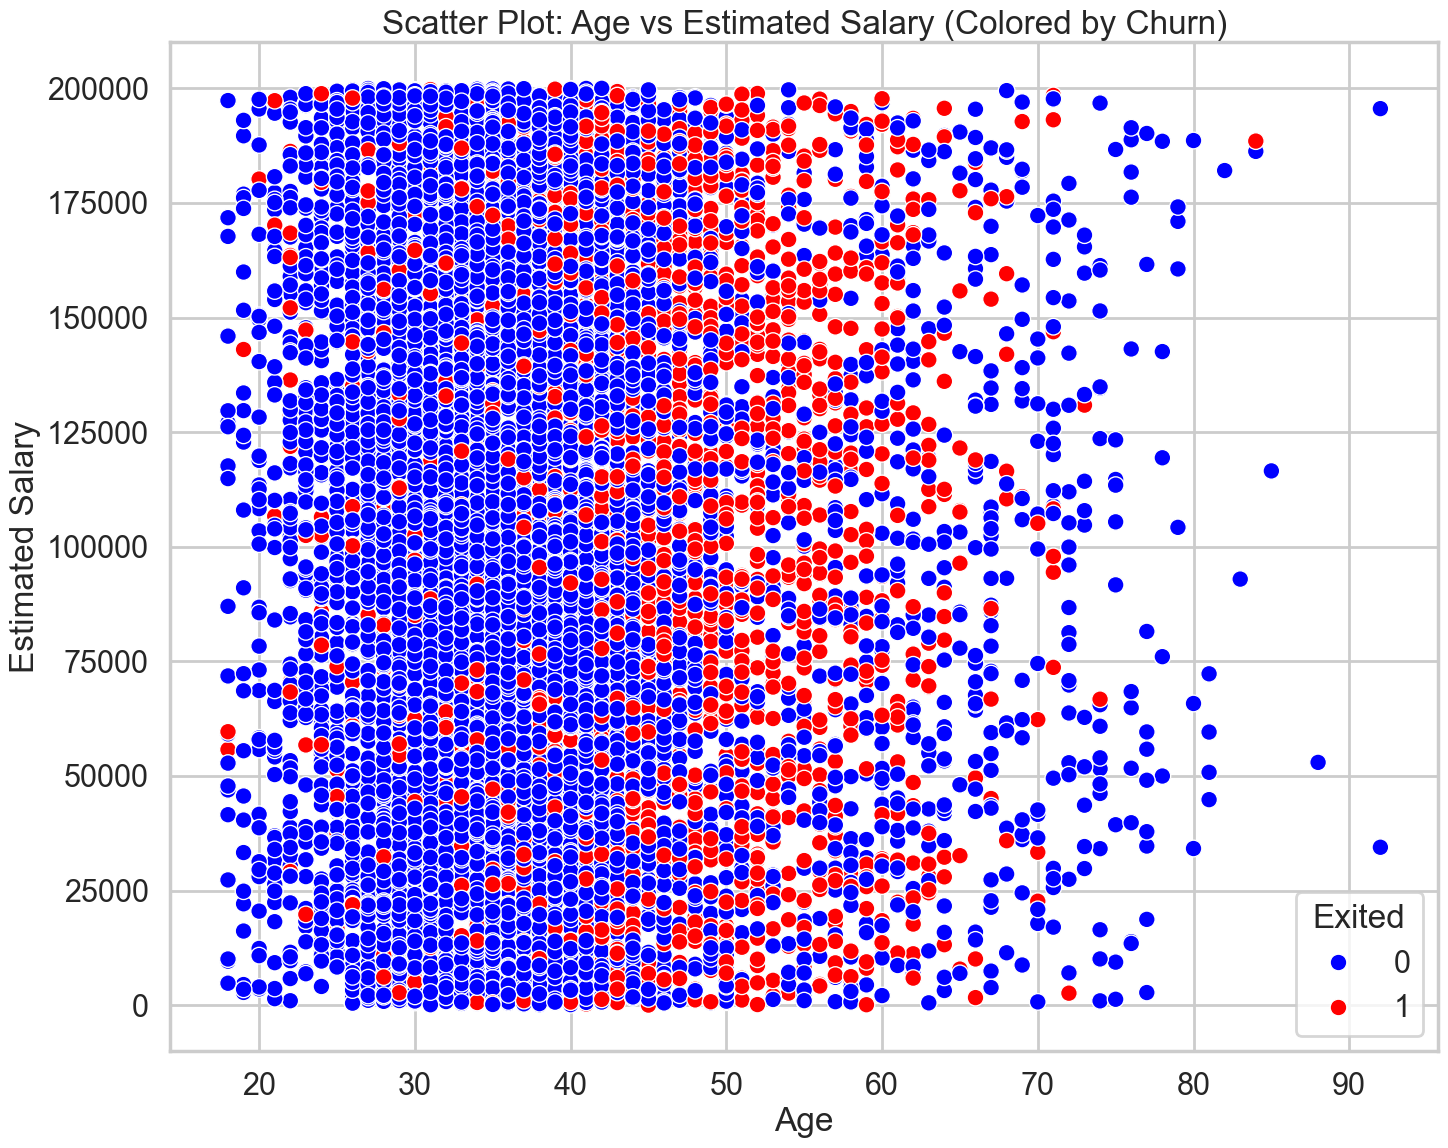

In [19]:
## TODO: Calculate the mean and standard deviation of the age for customers who stayed with the bank.

# Filtrer les clients qui sont restés (Exited = 0)
df_0 = df[df["Exited"] == 0]

# TODO: Calculate the mean and standard deviation of the age
mean_age_stayed = df_0["Age"].mean()
std_age_stayed = df_0["Age"].std()

print("Âge moyen des clients restés :", mean_age_stayed)
print("Écart type :", std_age_stayed)


plt.figure(figsize=(15, 12))
sns.scatterplot(data=df, x="Age", y="EstimatedSalary", hue="Exited", palette={0: "blue", 1: "red"})

plt.title("Scatter Plot: Age vs Estimated Salary (Colored by Churn)")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend(title="Exited")
plt.tight_layout()
plt.show()

Le churn touche principalement les clients entre 40 et 60 ans, indépendamment de leur salaire estimé. Les jeunes et les seniors quittent moins la banque. Le revenu n’apparaît pas comme un facteur clé.


In [20]:
## TODO: Calculate the mean and standard deviation of the age for customers who left the bank.

mean_age_left = df_1["Age"].mean()
std_age_left = df_1["Age"].std()

print("Âge moyen des clients partis :", mean_age_left)
print("Écart type :", std_age_left)

Âge moyen des clients partis : 44.8379970544919
Écart type : 9.76156155550719


In [22]:
## TODO: Perform a t-test to compare the ages of customers who stayed and left the bank.

t_stat, p_value = ttest_ind(df_0["Age"], df_1["Age"], equal_var=False)

print("Statistique t :", t_stat)
print("p-value :", p_value)

NameError: name 'ttest_ind' is not defined

### Using Bootstrapping

In [ ]:
## TODO: Write a function to perform bootstrap sampling and calculate the statistic of interest.
# def bs_choice(data, func, size):
#     bs_s =
#     for i in range(size):
#         bs_abc =
#         bs_s[i] = func(bs_abc)
#     return bs_s

SyntaxError: invalid syntax (ipython-input-12-2125643229.py, line 3)

In [13]:
## TODO: Calculate the difference in means and shift the ages to the overall mean.

In [14]:
## TODO: Perform bootstrap sampling to calculate the standard deviation for both groups and their difference.

In [15]:
## TODO: Calculate the p-value by comparing the difference in means to the bootstrap distribution.

### Conclusion
Do we reject the Null Hypothesis ? Why ?

## Hypothesis 2: Credit Score

In [16]:
## TODO: Create histograms for the CreditScore distribution of both groups (Still with bank and Left the bank).

In [17]:
## TODO: Perform a t-test to compare the CreditScore between the two groups (Still with bank and Left the bank).

### Conclusion
Do we reject the Null Hypothesis ? Why ?

## Hypothesis 3: Balance

In [18]:
## TODO: Plot the distribution of Balance for both groups (Still with bank and Left the bank).

In [19]:
## TODO: Perform a t-test to compare the Balance between customers who stayed with the bank and those who left.

In [20]:
## TODO: Visualize the distribution of Balance for customers who stayed with the bank and those who left, excluding zero balances.

In [21]:
## TODO: Perform a t-test to compare the Balance between customers who stayed with the bank and those who left, excluding zero balances.

## Conclusion

Do we reject the Null Hypothesis ? Why ?

## Hypothesis 4: Estimated Salary

In [22]:
## TODO: Plot the distribution of EstimatedSalary for customers who stayed with the bank and those who left.

In [23]:
## TODO: Perform a t-test to compare the EstimatedSalary between customers who stayed and those who left.

### Using Bootstrapping

In [24]:
## TODO: Calculate the difference in means and shift the EstimatedSalary for both groups.

In [25]:
## TODO: Calculate the bootstrap sample means for both groups and their difference.

In [26]:
## TODO: Calculate the p-value based on the bootstrap distribution of the difference in means.

### Conclusion
Do we reject the Null Hypothesis ? Why ?

## Final Conclusion
What will be the most helpful feature in predicting churning?
